In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## DAG

In [48]:
df = pd.read_csv("eval_dag-graph_100.csv", delim_whitespace=True)
df["time (s)"] = df["time (ms)"] / 1000
df["graph"] = df["file"].str.split("/").str[-1].str.split(".").str[0]
df.head()

,file,num_nodes,capacity,num_threads,work_factor,time (ms),success,time (s),graph
0,data/graph_100.graph,100,100,1,0.0,0.196858,1,0.000197,graph_100
1,data/graph_100.graph,100,100,1,0.0,0.119807,1,0.000120,graph_100
2,data/graph_100.graph,100,100,1,0.0,0.075418,1,0.000075,graph_100
3,data/graph_100.graph,100,100,1,0.0,0.088798,1,0.000089,graph_100
4,data/graph_100.graph,100,100,1,0.0,0.088203,1,0.000088,graph_100


In [76]:
def plot_dag(df, suffix=""):
    graph = df["graph"][0]
    num_nodes = df["num_nodes"][0]
    num_iterations = df.shape[0] // (len(df["num_threads"].unique()) * len(df["work_factor"].unique()))
    capacity = df["capacity"][0]


    fig, ax = plt.subplots()
    ax.set_title(f"{graph}, {num_iterations} iterations\nn={num_nodes}, capacity={capacity}")
    sns.pointplot(x="work_factor", y="time (s)", hue="num_threads", data=df)
    plt.savefig(f"{graph}-c={capacity}-per-workfactor{suffix}.png", dpi=300)
    plt.show()


    fig, ax = plt.subplots()
    ax.set_title(f"{graph}, {num_iterations} iterations\nn={num_nodes}, capacity={capacity}")
    sns.pointplot(hue="work_factor", y="time (s)", x="num_threads", data=df)
    plt.savefig(f"{graph}-c={capacity}-per-num_threads{suffix}.png", dpi=300)
    plt.show()

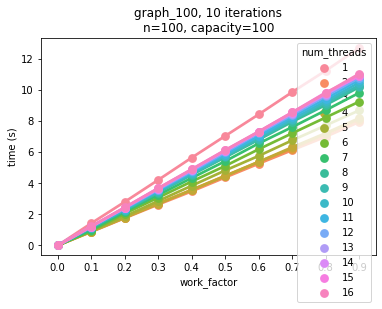

In [ ]:
df = pd.read_csv("recovery.csv", delim_whitespace=True)
df["time (s)"] = df["time (ms)"] / 1000
df["graph"] = df["file"].str.split("/").str[-1].str.split(".").str[0]
df.head()
plot_dag(df)

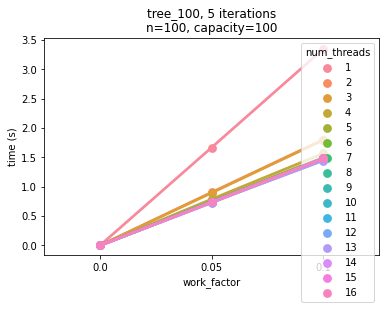

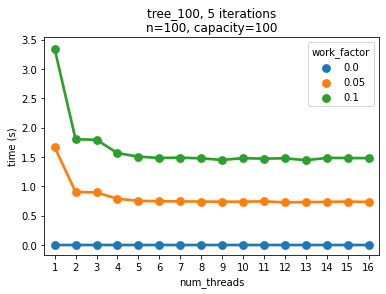

In [83]:
df = pd.read_csv("eval_tree-tree_100.csv", delim_whitespace=True)
df["time (s)"] = df["time (ms)"] / 1000
df["graph"] = df["file"].str.split("/").str[-1].str.split(".").str[0]
df.head()
plot_dag(df)

In [57]:
# build/eval_dag -file data/graph_100.graph -max-work-factor 0.0001 -num-iterations 100 | tee eval/eval_dag-graph_100-small-work-factors.csv

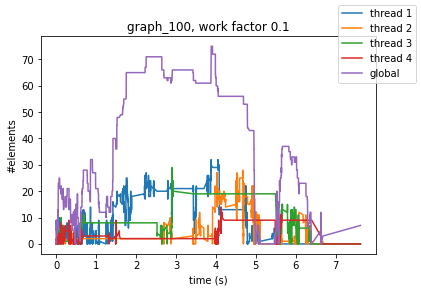

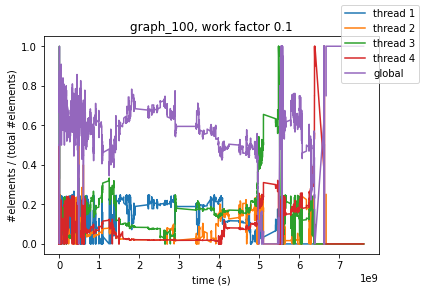

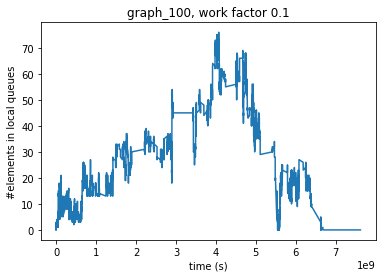

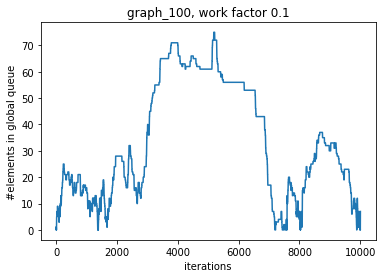

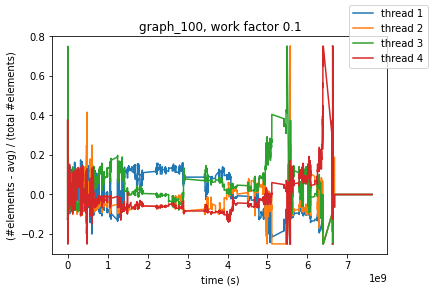

In [73]:
df = pd.read_csv("tree_solver_queue_sizes.csv", delim_whitespace=True)

# stats_tree_solver("../eval/tree_solver_queue_sizes_test.csv", file, max_num_threads, 0.1);

num_threads = 4
graph = "graph_100"
work_factor = 0.1
df["time (ns)"] = df["time"]
df["time (s)"] = df["time (ns)"] / 10**9
df["total_local_size"] = df["thread 1"] + df["thread 2"] + df["thread 3"] + df["thread 4"]
df["total_size"] = df["total_local_size"] + df["global"]
df["avg_local_size"] = df["total_local_size"] / num_threads


fig, ax = plt.subplots()
ax.set_title(f"{graph}, work factor {work_factor}")
ax.set_xlabel("time (s)")
ax.set_ylabel("#elements")
for col in ("thread 1", "thread 2", "thread 3", "thread 4", "global"):
    ax.plot(df["time (s)"], df[col], label=col)
fig.legend()
plt.savefig(f"tree-solver-queue-sizes-{graph}-{num_threads}-{work_factor}-num-elements.png", dpi=300)
plt.show()


fig, ax = plt.subplots()
ax.set_title(f"{graph}, work factor {work_factor}")
ax.set_xlabel("time (s)")
ax.set_ylabel("#elements / (total #elements)")
for col in ("thread 1", "thread 2", "thread 3", "thread 4", "global"):
    ax.plot(df["time"], df[col] / df["total_size"], label=col)
fig.legend()
plt.savefig(f"tree-solver-queue-sizes-{graph}-{num_threads}-{work_factor}-percent-elements-total.png", dpi=300)
plt.show()


fig, ax = plt.subplots()
ax.set_title(f"{graph}, work factor {work_factor}")
ax.set_xlabel("time (s)")
ax.set_ylabel("#elements in local queues")
ax.plot(df["time"], df["total_local_size"])
plt.savefig(f"tree-solver-queue-sizes-{graph}-{num_threads}-{work_factor}-percent-elements-local.png", dpi=300)
plt.show()

fig, ax = plt.subplots()
ax.set_title(f"{graph}, work factor {work_factor}")
ax.set_xlabel("iterations")
ax.set_ylabel("#elements in global queue")
ax.plot(df["global"])
plt.savefig(f"tree-solver-queue-sizes-{graph}-{num_threads}-{work_factor}-global-queue.png", dpi=300)
plt.show()

fig, ax = plt.subplots()
ax.set_title(f"{graph}, work factor {work_factor}")
ax.set_xlabel("time (s)")
ax.set_ylabel("(#elements - avg) / (total #elements)")
for col in ("thread 1", "thread 2", "thread 3", "thread 4"):
    ax.plot(df["time"], (df[col] - df["avg_local_size"]) / df["total_size"], label=col)
fig.legend()
plt.savefig(f"tree-solver-queue-sizes-{graph}-{num_threads}-{work_factor}-normalized-difference.png", dpi=300)
plt.show()